<a href="https://colab.research.google.com/github/0011Ashwin/Google-Colab-Work/blob/main/Simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple-neural-network

In [1]:
import torch
# import torch.nn -> nn stands for neural-network
import torch.nn as nn
# import torch.nn.functional as F -> helps us to forward our input to hidden layer to output layer
import torch.nn.functional as F

## Model building and neurons of hidden layer

In [2]:
# Create  a Model class that inherits as nn.Module
# h1 -> hidden layer
class Model(nn.Module):
  # Input layer of our model(feature of dataset)
  # Hidden layer-1 -> h1 (number of neurons)
  # Hidden layer-2 -> 2h (number of neurons)
  # out_features for output-layer
  def __init__(self, in_features = 4 , h1 = 8 , h2 = 9, out_features=3):

    # instantiate our nn.model
    super().__init__()

    # fc1 is connecting layer one-to-one in each nuron
    self.fc1 = nn.Linear(in_features, h1)

    # So , now h1 is connected with input layer so we start with h1 and h2
    self.fc2 = nn.Linear(h1, h2)

    # so here we using only two neural netowrk h1 and h2 so next-layer will connected with output-layer
    # self.out -> is for output-layer
    self.out = nn.Linear(h2, out_features)


  # now we need function that forward everything into
  def forward(self, x):
    # so now we call function as (F) from torch.nn
    # Push into in first layer
    x = F.relu(self.fc1(x))
    # Push into in 2nd layer
    x = F.relu(self.fc2(x))
    # Push into last layer to output-layer
    x = self.out(x)


    return x






## Generating random numbers for model
Seeding manually for model

In [3]:
# Pick a manual seed for randomization
torch.manual_seed(42)

# Create an instance of our model
model = Model()

## Importing few basic library tools for framing the datasets for model
Here we are using iris dataset to train our neuron on length and color of flower with their species or variety

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

Dataset used from github

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# Chaning 'Species' with number for handling categoryly data
# my_df.loc[my_df['species'] == 'setosa', 'species'] = 0
# 0.0 is for setosa
# 1.0 is for versicolor
# 2.0 is for virginica
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-7-1ff7f89566e0>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
# Train and test split
X = my_df.drop('species', axis=1)
y = my_df['species']

In [9]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Train and test spli
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [12]:
# Convert X feartures to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [13]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
# set the criterion of model to measure the error , how far off the predicitions are from dataset
criterion = nn.CrossEntropyLoss()
# choose Adam Optimizer lr = learning rate (if error dose not go down after a bunch of learning rate)
# here lr -> is learning rate
# lower the learning rate cause in model -> model learn less and it will take time consuming
# model.parameters -> are fc1 , fc2 , and output-layer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

## Model training

In [16]:
# train our model
# Epochs ? (one run thru all the traning data in our network) or simple we can say one forward and one backward propogation is called epochs
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a perdiction
  y_pred = model.forward(X_train) # get predicted results

  # Measures the loss/error in model
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  #keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back-propogation -> updating weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.0935204029083252
Epoch: 10 and loss: 0.9156657457351685
Epoch: 20 and loss: 0.7562994360923767
Epoch: 30 and loss: 0.6108629107475281
Epoch: 40 and loss: 0.44145309925079346
Epoch: 50 and loss: 0.2723323404788971
Epoch: 60 and loss: 0.16078141331672668
Epoch: 70 and loss: 0.09846457839012146
Epoch: 80 and loss: 0.06856968253850937
Epoch: 90 and loss: 0.05372077599167824


## Graph

Text(0.5, 0, 'Epoch')

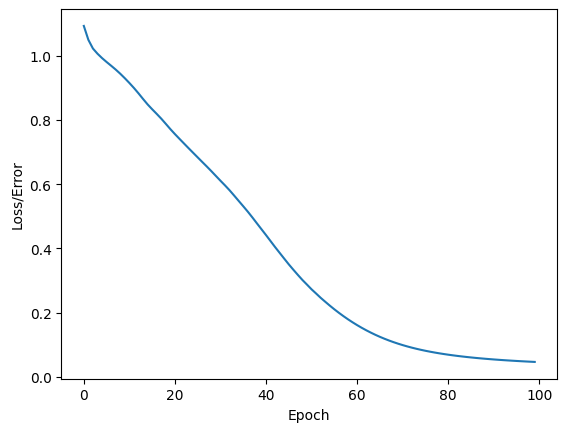

In [17]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')

In [18]:
# Evalute model on test Data set (Validate model on test set)
with torch.no_grad():# Basically turn off back - propogation
  # X_test is a feature for test-set where as y_eval is for predictio
  # here forward  fucntion are relu which define in uper part of code
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [19]:
loss

tensor(0.1311)

In [20]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "setosa"
    elif y_test[i] == 1:
      x = "versicolor"
    else:
      x = "virginica"



    # will tell us what type of flower class
    # 0.0
    # 1.0
    # 2.0
    # {y_test[i]}
    # x show flower name e
      print(f"{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

  print(f"We got {correct} correct!")

1.) tensor([-4.9014,  3.6766,  6.4883]) 	 2 	 2
2.) tensor([-7.4458,  2.4418,  9.1490]) 	 2 	 2
3.) tensor([-7.6378,  3.5400,  9.5076]) 	 2 	 2
5.) tensor([-6.0028,  3.7181,  7.7264]) 	 2 	 2
7.) tensor([-4.0793,  4.4034,  5.6892]) 	 2 	 2
9.) tensor([-4.9591,  4.0803,  6.6220]) 	 2 	 2
10.) tensor([-7.7881,  2.6545,  9.5597]) 	 2 	 2
11.) tensor([-3.6737,  4.5547,  5.2627]) 	 2 	 2
16.) tensor([-3.4022,  5.0489,  5.0158]) 	 2 	 1
22.) tensor([-6.9013,  3.2458,  8.6608]) 	 2 	 2
We got 28 correct!


## New data feeding in model

In [21]:
new_iris = torch.tensor([5.1, 3.5, 1.4,	0.2])

In [22]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 7.9524,  2.5983, -6.5881])


In [23]:
tp = torch.tensor([2.3, 4.4, 3.6, 1.5])

In [24]:
with torch.no_grad():
  print(model(tp))

tensor([-0.1447,  3.5855,  1.2497])


## Save or Load model

In [25]:
# Save our NN Model
torch.save(model.state_dict(), 'iris_model.pt')

In [26]:
# How do we load this save model
# Model_function
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [27]:
# Make sure it loaded correctly
new_model.eval()


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)